In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_curve, roc_auc_score


In [2]:
dataset=pd.read_csv(r"C:\Users\NAIB\OneDrive\Desktop\hprt\cancer patient data sets.csv",index_col=0)
dataset=dataset.sample(frac=1)
dataset.head(5)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
101,P19,38,2,2,1,5,3,2,3,2,...,6,7,2,5,8,1,3,2,3,Medium
905,P913,34,1,6,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
767,P79,35,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
539,P584,26,1,6,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High


In [3]:
dataset['Level'].replace(to_replace=["Low", "Medium", "High"], value = [1, 2, 3], inplace = True)

In [4]:
dataset=dataset.drop('Patient Id',axis=1)
dataset

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
101,38,2,2,1,5,3,2,3,2,4,...,6,7,2,5,8,1,3,2,3,2
905,34,1,6,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
767,35,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
539,26,1,6,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,18,2,3,2,1,3,2,1,3,2,...,2,2,1,3,4,4,1,4,1,1
214,37,1,8,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
218,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3


In [5]:
standard = StandardScaler()
dataset_standard = standard.fit_transform(dataset)
dataset_standard_2 = pd.DataFrame(data = dataset_standard, columns = dataset.keys())

Text(0.5, 1.0, 'Correlation Matriz')

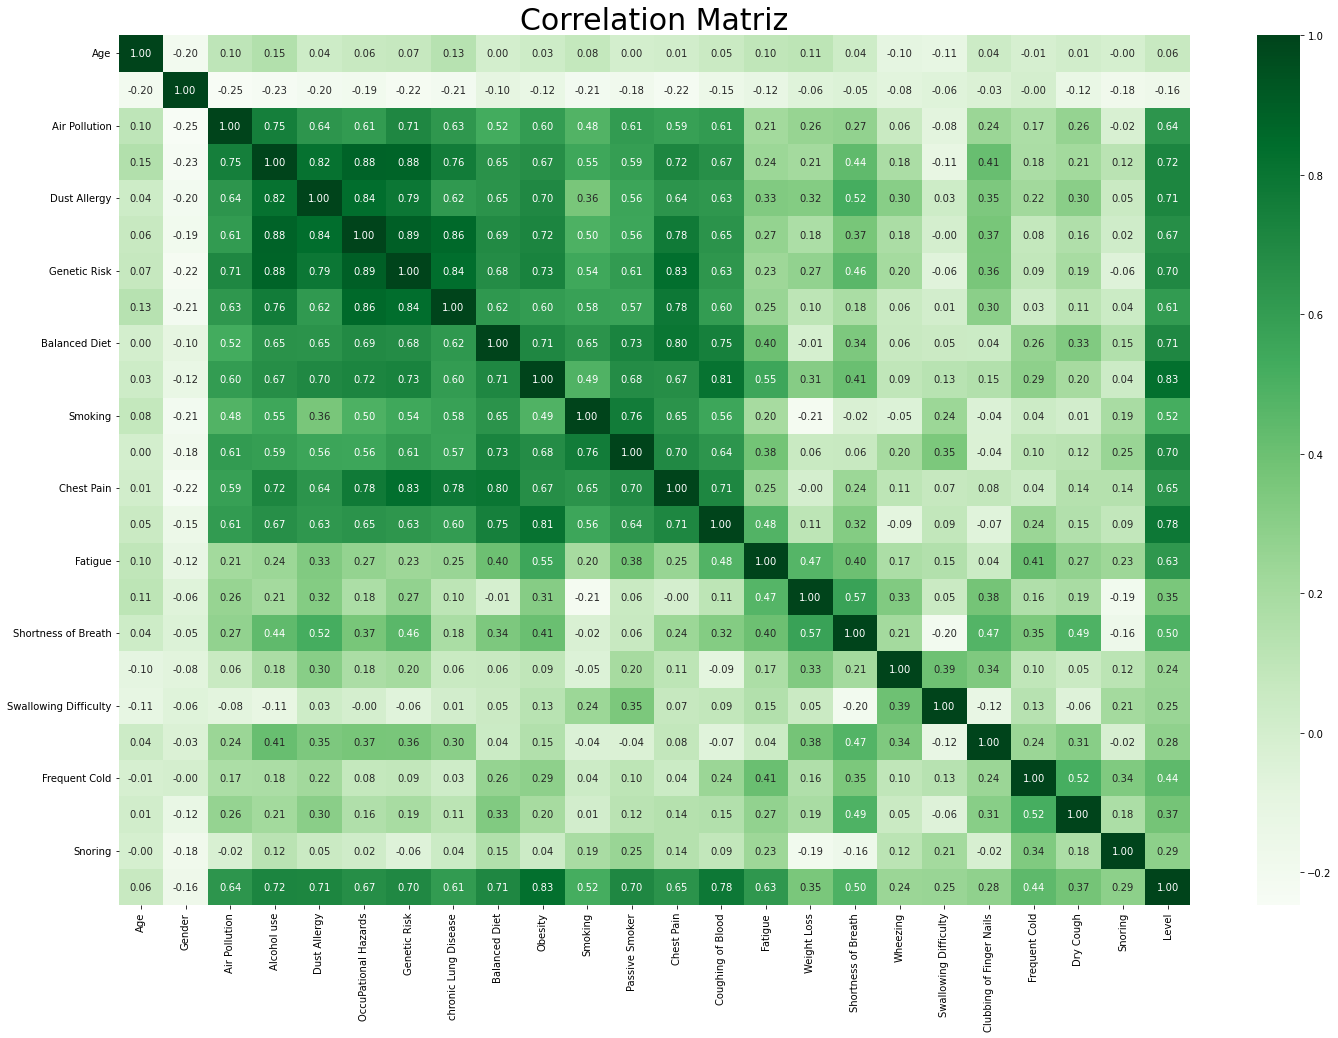

In [6]:
correlation = dataset_standard_2.corr()
graph = sns.heatmap(correlation, annot = True, fmt = '.2f',cmap='Greens')
graph.figure.set_size_inches(24, 16)
graph.set_title('Correlation Matriz', fontsize = 30)

In [7]:
X = dataset_standard_2.iloc[:, :23].values
y = dataset.iloc[:, 23].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

Accuracy: 0.88


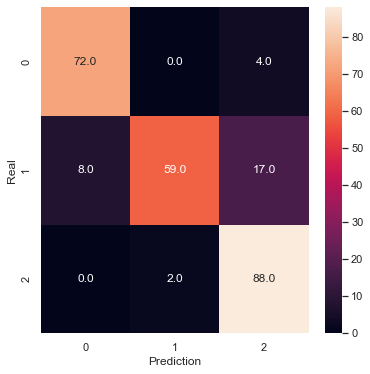

In [8]:
from sklearn.metrics import confusion_matrix

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_predict = bnb.predict(X_test)

accuracy_bnb = accuracy_score(y_test, bnb_predict)

confusion_matrix = confusion_matrix(y_test, bnb_predict)
plt.figure(figsize = (6,6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = 'Prediction', ylabel = 'Real')

print('Accuracy: {:.2f}'.format(accuracy_bnb))

In [9]:
input=676
input_data = (X[input])


# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Use the trained Random Forest model to predict the lung cancer stage for the input data
prediction = bnb.predict(input_data_reshaped)
# Map the prediction to a text label
if prediction == 1:
            print('Low')
elif prediction == 2:
           print('medium')
else:
    print('high')            
print(prediction)
print(dataset['Level'][input])


high
[3]
3


In [10]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [11]:
import joblib

# Assuming 'model' is your trained Bernoulli Naive Bayes model
# Replace 'your_model.pkl' with the desired file path
joblib.dump(bnb,'lung cancer rf')


['lung cancer rf']

In [ ]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import joblib  # Import joblib

# Load your trained model
model = joblib.load('lung cancer rf')  # Replace 'lungcancer_rf.pkl' with your actual model file


# Function to predict lung cancer stage
def predict_lung_cancer():
    try:
        # Get input values from the user
        age = float(age_entry.get())
        gender = int(gender_var.get())  # Assuming 1 for Male, 2 for Female
        air_pollution = int(air_pollution_entry.get())
        alcohol_use = int(alcohol_use_entry.get())
        dust_allergy = int(dust_allergy_entry.get())
        occupational_hazards = int(occupational_hazards_entry.get())
        genetic_risk = int(genetic_risk_entry.get())
        chronic_lung_disease = int(chronic_lung_disease_entry.get())
        balanced_diet = int(balanced_diet_entry.get())
        obesity = int(obesity_entry.get())
        smoking = int(smoking_entry.get())
        passive_smoker = int(passive_smoker_entry.get())
        chest_pain = int(chest_pain_entry.get())
        coughing_of_blood = int(coughing_of_blood_entry.get())
        fatigue = int(fatigue_entry.get())
        weight_loss = int(weight_loss_entry.get())
        shortness_of_breath = int(shortness_of_breath_entry.get())
        wheezing = int(wheezing_entry.get())
        swallowing_difficulty = int(swallowing_difficulty_entry.get())
        clubbing_of_finger_nails = int(clubbing_of_finger_nails_entry.get())
        frequent_cold = int(frequent_cold_entry.get())
        dry_cough = int(dry_cough_entry.get())
        snoring = int(snoring_entry.get())

        # Create an input data array
        input_data = [age, gender, air_pollution, alcohol_use, dust_allergy, occupational_hazards,
                      genetic_risk, chronic_lung_disease, balanced_diet, obesity, smoking, passive_smoker,
                      chest_pain, coughing_of_blood, fatigue, weight_loss, shortness_of_breath, wheezing,
                      swallowing_difficulty, clubbing_of_finger_nails, frequent_cold, dry_cough, snoring]

        # Use the trained model to predict the lung cancer stage
        prediction = model.predict([input_data])

        # Map the prediction to a text label
        if prediction == 1:
            prediction_label.config(text='Low')
        elif prediction == 2:
            prediction_label.config(text='Medium')
        else:
            prediction_label.config(text='High')
    except ValueError:
        prediction_label.config(text='Invalid input values')

# Create the main window
window = tk.Tk()
window.title("Lung Cancer Stage Predictor")
# Create a custom title label with a pink background
title_label = ttk.Label(window, text="Lung Cancer Stage Detector", font=("Helvetica", 16, "bold"), background='lightpink')
title_label.grid(row=0, column=0, columnspan=2, pady=10, sticky="nsew")

# Create and configure input widgets
age_label = ttk.Label(window, text="Age:")
age_entry = ttk.Entry(window)
age_label.grid(row=1, column=0)
age_entry.grid(row=1, column=1)

gender_label = ttk.Label(window, text="Gender (1: Male, 2: Female):")
gender_var = tk.StringVar()
gender_combobox = ttk.Combobox(window, textvariable=gender_var, values=["1", "2"])
gender_label.grid(row=2, column=0)
gender_combobox.grid(row=2, column=1)

# Add more input widgets for other features...
air_pollution_label = ttk.Label(window, text="Air Pollution (1-10):")
air_pollution_entry = ttk.Entry(window)
air_pollution_label.grid(row=3, column=0)
air_pollution_entry.grid(row=3, column=1)

alcohol_use_label = ttk.Label(window, text="Alcohol Use (1-10):")
alcohol_use_entry = ttk.Entry(window)
alcohol_use_label.grid(row=4, column=0)
alcohol_use_entry.grid(row=4, column=1)

dust_allergy_label = ttk.Label(window, text="Dust Allergy (1-10):")
dust_allergy_entry = ttk.Entry(window)
dust_allergy_label.grid(row=5, column=0)
dust_allergy_entry.grid(row=5, column=1)

occupational_hazards_label = ttk.Label(window, text="Occupational Hazards (1-10):")
occupational_hazards_entry = ttk.Entry(window)
occupational_hazards_label.grid(row=6, column=0)
occupational_hazards_entry.grid(row=6, column=1)

genetic_risk_label = ttk.Label(window, text="Genetic Risk (1-10):")
genetic_risk_entry = ttk.Entry(window)
genetic_risk_label.grid(row=7, column=0)
genetic_risk_entry.grid(row=7, column=1)

chronic_lung_disease_label = ttk.Label(window, text="Chronic Lung Disease (1-10):")
chronic_lung_disease_entry = ttk.Entry(window)
chronic_lung_disease_label.grid(row=8, column=0)
chronic_lung_disease_entry.grid(row=8, column=1)

balanced_diet_label = ttk.Label(window, text="Balanced Diet (1-10):")
balanced_diet_entry = ttk.Entry(window)
balanced_diet_label.grid(row=9, column=0)
balanced_diet_entry.grid(row=9, column=1)

obesity_label = ttk.Label(window, text="Obesity (1-10):")
obesity_entry = ttk.Entry(window)
obesity_label.grid(row=10, column=0)
obesity_entry.grid(row=10, column=1)

smoking_label = ttk.Label(window, text="Smoking (1-10):")
smoking_entry = ttk.Entry(window)
smoking_label.grid(row=11, column=0)
smoking_entry.grid(row=11, column=1)

passive_smoker_label = ttk.Label(window, text="Passive Smoker (1-10):")
passive_smoker_entry = ttk.Entry(window)
passive_smoker_label.grid(row=12, column=0)
passive_smoker_entry.grid(row=12, column=1)

chest_pain_label = ttk.Label(window, text="Chest Pain (1-10):")
chest_pain_entry = ttk.Entry(window)
chest_pain_label.grid(row=13, column=0)
chest_pain_entry.grid(row=13, column=1)

coughing_of_blood_label = ttk.Label(window, text="Coughing of Blood (1-10):")
coughing_of_blood_entry = ttk.Entry(window)
coughing_of_blood_label.grid(row=14, column=0)
coughing_of_blood_entry.grid(row=14, column=1)

fatigue_label = ttk.Label(window, text="Fatigue (1-10):")
fatigue_entry = ttk.Entry(window)
fatigue_label.grid(row=15, column=0)
fatigue_entry.grid(row=15, column=1)

weight_loss_label = ttk.Label(window, text="Weight Loss (1-10):")
weight_loss_entry = ttk.Entry(window)
weight_loss_label.grid(row=16, column=0)
weight_loss_entry.grid(row=16, column=1)

shortness_of_breath_label = ttk.Label(window, text="Shortness of Breath (1-10):")
shortness_of_breath_entry = ttk.Entry(window)
shortness_of_breath_label.grid(row=17, column=0)
shortness_of_breath_entry.grid(row=17, column=1)

wheezing_label = ttk.Label(window, text="Wheezing (1-10):")
wheezing_entry = ttk.Entry(window)
wheezing_label.grid(row=18, column=0)
wheezing_entry.grid(row=18, column=1)

swallowing_difficulty_label = ttk.Label(window, text="Swallowing Difficulty (1-10):")
swallowing_difficulty_entry = ttk.Entry(window)
swallowing_difficulty_label.grid(row=19, column=0)
swallowing_difficulty_entry.grid(row=19, column=1)

clubbing_of_finger_nails_label = ttk.Label(window, text="Clubbing of Finger Nails (1-10):")
clubbing_of_finger_nails_entry = ttk.Entry(window)
clubbing_of_finger_nails_label.grid(row=20, column=0)
clubbing_of_finger_nails_entry.grid(row=20, column=1)

frequent_cold_label = ttk.Label(window, text="Frequent Cold (1-10):")
frequent_cold_entry = ttk.Entry(window)
frequent_cold_label.grid(row=21, column=0)
frequent_cold_entry.grid(row=21, column=1)

dry_cough_label = ttk.Label(window, text="Dry Cough (1-10):")
dry_cough_entry = ttk.Entry(window)
dry_cough_label.grid(row=22, column=0)
dry_cough_entry.grid(row=22, column=1)

snoring_label = ttk.Label(window, text="Snoring (1-10):")
snoring_entry = ttk.Entry(window)
snoring_label.grid(row=23, column=0)
snoring_entry.grid(row=23, column=1)

# Create a "Predict" button
predict_button = ttk.Button(window, text="Predict Lung Cancer Stage", command=predict_lung_cancer)
predict_button.grid(row=24, columnspan=2)

# Display the prediction result
prediction_label = ttk.Label(window, text="")
prediction_label.grid(row=25, columnspan=2)

# Run the GUI application
window.mainloop()


In [71]:
'''##################
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import joblib

# Load your trained model
model = joblib.load('lung cancer rf')  # Replace with your model file path


# Function to update the prediction label
def update_prediction():
    try:
        # Get input values from the user and perform type conversion
        age = float(age_entry.get())
        gender = int(gender_combobox.get())
        air_pollution = int(air_pollution_entry.get())
        alcohol_use = int(alcohol_use_entry.get())
        dust_allergy = int(dust_allergy_entry.get())
        occupational_hazards = int(occupational_hazards_entry.get())
        genetic_risk = int(genetic_risk_entry.get())
        chronic_lung_disease = int(chronic_lung_disease_entry.get())
        balanced_diet = int(balanced_diet_entry.get())
        obesity = int(obesity_entry.get())
        smoking = int(smoking_entry.get())
        passive_smoker = int(passive_smoker_entry.get())
        chest_pain = int(chest_pain_entry.get())
        coughing_of_blood = int(coughing_of_blood_entry.get())
        fatigue = int(fatigue_entry.get())
        weight_loss = int(weight_loss_entry.get())
        shortness_of_breath = int(shortness_of_breath_entry.get())
        wheezing = int(wheezing_entry.get())
        swallowing_difficulty = int(swallowing_difficulty_entry.get())
        clubbing_of_finger_nails = int(clubbing_of_finger_nails_entry.get())
        frequent_cold = int(frequent_cold_entry.get())
        dry_cough = int(dry_cough_entry.get())
        snoring = int(snoring_entry.get())

        # Create an input data array
        input_data = [age, gender, air_pollution, alcohol_use, dust_allergy, occupational_hazards,
                      genetic_risk, chronic_lung_disease, balanced_diet, obesity, smoking, passive_smoker,
                      chest_pain, coughing_of_blood, fatigue, weight_loss, shortness_of_breath, wheezing,
                      swallowing_difficulty, clubbing_of_finger_nails, frequent_cold, dry_cough, snoring]

        # Use the trained model to predict the lung cancer stage
        prediction = model.predict([input_data])

        # Display the prediction as text in bold without images
        if prediction == 0:
            prediction_label.config(text='Low', image=None)
        elif prediction == 1:
            prediction_label.config(text='Medium', image=None)
        else:
            prediction_label.config(text='High', image=None)
    except ValueError:
        prediction_label.config(text='Invalid input values')

# Function to reset the prediction label and image
def reset_prediction():
    prediction_label.config(text='', image=None)

# Create a custom title label with a pink background
title_label = ttk.Label(window, text="Lung Cancer Stage Detector", font=("Helvetica", 16, "bold"), background='lightpink')
title_label.grid(row=0, column=0, columnspan=2, pady=10, sticky="nsew")

# Create a custom style for LabelFrame with a pink background
window.style = ttk.Style()
window.style.configure("LightPink.TLabelframe", background="lightpink")

# Create and configure input frame with a light pink background
input_frame = ttk.LabelFrame(window, text="Patient Information", padding=(10, 10), style="LightPink.TLabelframe")
input_frame.grid(row=1, column=0, padx=20, pady=10, sticky="nsew")

# Create a custom style for Entry and Combobox widgets
window.style.configure("LightPink.TEntry", fieldbackground="lightpink")

# Create a custom style for labels with a pink background and bold attributes
window.style.configure("Pink.TLabel", background="lightpink", font=("Helvetica", 10, "bold"))

# Add input widgets for other features with the pink background and bold attributes
widgets = {
    "age": "Age:",
    "gender": "Gender (1: Male, 2: Female):",
    "air_pollution": "Air Pollution (1-10):",
    "alcohol_use": "Alcohol Use (1-10):",
    "dust_allergy": "Dust Allergy (1-10):",
    "occupational_hazards": "Occupational Hazards (1-10):",
    "genetic_risk": "Genetic Risk (1-10):",
    "chronic_lung_disease": "Chronic Lung Disease (1-10):",
    "balanced_diet": "Balanced Diet (1-10):",
    "obesity": "Obesity (1-10):",
    "smoking": "Smoking (1-10):",
    "passive_smoker": "Passive Smoker (1-10):",
    "chest_pain": "Chest Pain (1-10):",
    "coughing_of_blood": "Coughing of Blood (1-10):",
    "fatigue": "Fatigue (1-10):",
    "weight_loss": "Weight Loss (1-10):",
    "shortness_of_breath": "Shortness of Breath (1-10):",
    "wheezing": "Wheezing (1-10):",
    "swallowing_difficulty": "Swallowing Difficulty (1-10):",
    "clubbing_of_finger_nails": "Clubbing of Finger Nails (1-10):",
    "frequent_cold": "Frequent Cold (1-10):",
    "dry_cough": "Dry Cough (1-10):",
    "snoring": "Snoring (1-10):",
}

for widget_name, label_text in widgets.items():
    label = ttk.Label(input_frame, text=label_text, style="Pink.TLabel")
    entry = ttk.Entry(input_frame, style="LightPink.TEntry")
    label.grid(sticky="w", row=list(widgets.keys()).index(widget_name), column=0)
    entry.grid(sticky="w", row=list(widgets.keys()).index(widget_name), column=1)

# Add "Predict" and "Reset" buttons
predict_button = ttk.Button(window, text="Predict Lung Cancer Stage", command=update_prediction)
predict_button.grid(row=2, column=0, pady=20)

reset_button = ttk.Button(window, text="Reset", command=reset_prediction)
reset_button.grid(row=2, column=1, pady=20)

# Display the prediction result as text in bold
result_frame = ttk.LabelFrame(window, text="Prediction", padding=(10, 10))
result_frame.grid(row=3, column=0, padx=20, pady=10, sticky="nsew")

# Label for prediction result as text in bold
prediction_label = ttk.Label(result_frame, text="", foreground="red", font=("Helvetica", 12, "bold"))
prediction_label.grid(row=0, column=0, pady=10)

# Add the 'lungs.jpg' image on the right side
lungs_image = Image.open('lungs.jpg')
lungs_image = ImageTk.PhotoImage(lungs_image.resize((200, 200)))  # Adjust the size as needed

lungs_label = ttk.Label(window, image=lungs_image)
lungs_label.grid(row=0, column=1, rowspan=4, padx=20)

# Run the GUI application
window.mainloop()'''



TclError: NULL main window